In [1]:
import numpy as np
import seaborn as sns
import mne

In [2]:
# Load raw data and event information
raw = mne.io.read_raw_brainvision('../../data/raw/pta_sub-2.vhdr')
events, event_ids = mne.events_from_annotations(raw)
print(events)

Extracting parameters from ../../data/raw/pta_sub-2.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33']
[[       0        0    99999]
 [   38854        0       13]
 [   41224        0       13]
 ...
 [20200895        0       11]
 [20203515        0       12]
 [20206117        0       12]]


In [3]:
onsets = events[:,0] # units is samples, sampling rate is 5k
isi = np.array([x - y for x, y in zip(onsets[1:], onsets)])
isi = isi[isi < 100000]
indexes_of_first_tones = np.where(isi > 5000)[0]

(0.15, 0.31)

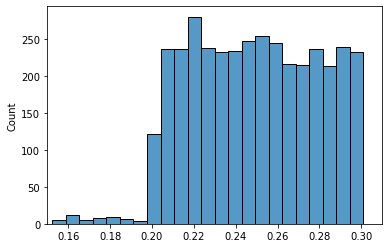

In [12]:
time_between_all_tones = isi[isi < 5000]/5000
ax = sns.histplot(data=time_between_all_tones-0.3)
ax.set_xlim(0.15, 0.31)

0.49876200000000004

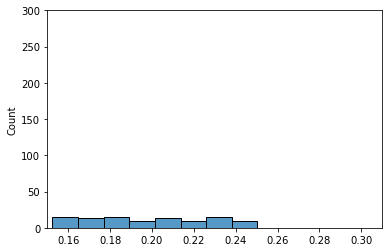

In [13]:
time_between_first_and_second_tones = isi[indexes_of_first_tones + 1]/5000
ax = sns.histplot(data=time_between_first_and_second_tones-0.3)
ax.set_xlim(0.15, 0.31)
ax.set_ylim(0, 300)
np.mean(time_between_first_and_second_tones)

0.550489183222958

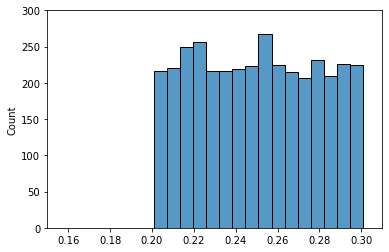

In [14]:
indexes_of_first_and_second_tones = np.concatenate((indexes_of_first_tones, indexes_of_first_tones + 1))
indexes_of_all_tones_but_first_and_second_tones = list(set(np.arange(len(isi))) ^ set(indexes_of_first_and_second_tones))
time_between_tones_after_second = isi[indexes_of_all_tones_but_first_and_second_tones]/5000
ax = sns.histplot(data=time_between_tones_after_second-0.3)
ax.set_xlim(0.15, 0.31)
ax.set_ylim(0, 300)
np.mean(time_between_tones_after_second)

<AxesSubplot:ylabel='Count'>

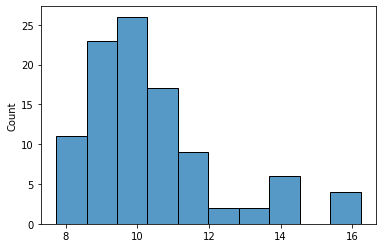

In [15]:
time_between_sequences = isi[indexes_of_first_tones]/5000
sns.histplot(data=time_between_sequences)